# Redes Convolucionales

- La meta es reducir el ancho/alto y aumentar la profundidad
- Transformar información espacial en features (feature maps)

In [27]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from fnn_helper import PlotLosses
from MNIST_helper import plot_numbers, visualize_input
import draw_nn

Using TensorFlow backend.


Intro CNNs: https://youtu.be/HrYNL_1SV2Y
Convolutional Layers 1: https://youtu.be/h5R_JvdUrUI
Convolutional Layers 2: https://youtu.be/RnM1D-XI--8
Pooling layers: https://youtu.be/OkkIZNs7Cyc
CNNs for image classification: https://youtu.be/l9vg_1YUlzg


In [105]:
from keras.datasets import mnist
validation = 0.20

(x, y), (x_test, y_test) = mnist.load_data()

N_validation_split = int(x.shape[0]*(1-validation))
x_train = x[:N_validation_split]
y_train = y[:N_validation_split]

x_val = x[N_validation_split:]
y_val = y[N_validation_split:]

x_train = x_train.reshape(x_train.shape + (1,))
x_val = x_val.reshape(x_val.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [108]:
x_train.shape

(48000, 28, 28, 1)

In [72]:
print('Training set data:', x_train.shape)
print('Training labels:', y_train.shape)
print()
print('CV set data:', x_val.shape)
print('CV labels:', y_val.shape)
print()
print('Testing set data:',x_test.shape)
print('Testing labels:', y_test.shape)

Training set data: (48000, 28, 28)
Training labels: (48000,)

CV set data: (12000, 28, 28)
CV labels: (12000,)

Testing set data: (10000, 28, 28)
Testing labels: (10000,)


In [73]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_val_categorical = keras.utils.to_categorical(y_val)
y_test_categorical = keras.utils.to_categorical(y_test)
y_train_categorical.shape

(48000, 10)

In [42]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils

In [36]:
x_test.shape[1:]

(28, 28)

In [63]:
# kernel_size tipicamente entre 2 y 5 (2x2, 5x5)
# input_shape=(alto,ancho,cantidad de canales) blanco y negro el utlimo es 1

In [109]:
model = Sequential()
model.add(Convolution2D(filters=14, kernel_size=2, padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=28, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=56, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 14)        70        
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 28)        1596      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 28)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 56)          6328      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 3, 3, 56)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 504)               0         
__________

In [110]:
# Cantidad de parametros
features_maps=14
filters=28
kernel_size = 2
features_maps*filters*kernel_size*kernel_size+filters

1596

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

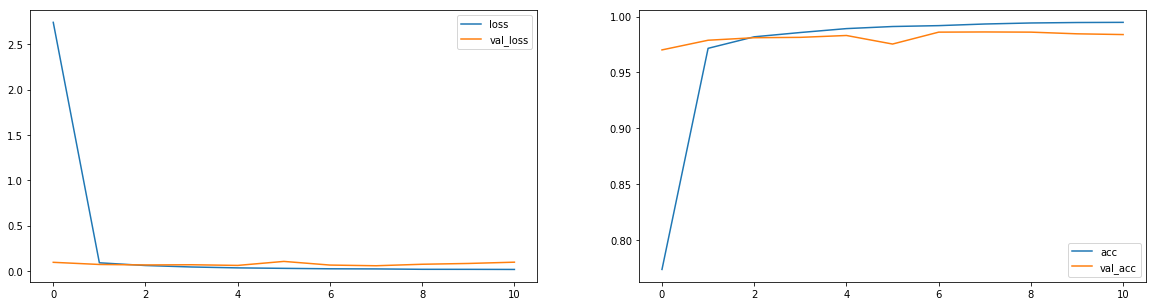

48000/48000 [==============================] - 30s - loss: 0.0178 - acc: 0.9949 - val_loss: 0.0978 - val_acc: 0.9839
Epoch 12/200
33700/48000 [====================>.........] - ETA: 8s - loss: 0.0142 - acc: 0.9958

In [ ]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=None, y_val_categorical=None)

model.fit(x_train, 
          y_train_categorical,
          epochs=200, batch_size=100, 
          #verbose=1, 
          validation_data=(x_val, y_val_categorical), 
          callbacks=[plot_losses],
         )